Динамическая модель спутника на орбите может быть записана через уравнение кеплера:
$$ \begin{equation}
\ddot{\vec{r}} + \frac{\mu}{r^3}\vec{r} = 0
\end{equation} $$
Где $\vec{r}$ это вектор направленный от центра масс Земли к спутнику, $\mu$ гравитационная постоянная, $\mu = GM$, где $M$ это масса Земли. 

Известно что уравнение движения по опорной орбите будет:
$$ \begin{equation}
\ddot{\vec{r_c}} + \frac{\mu}{r_c^3}\vec{r_c} = 0
\end{equation} $$
Тогда уравнения движения для спутников будет:
$$ \begin{equation}
\ddot{\vec{r_d}} + \frac{\mu}{r_d^3}\vec{r_d} = f 
\end{equation} $$ 
Где $f$ представляет собой сумму возмущающих и управляющих сил, действующих на спутник

Тогда относительное движение описывается уравнением Хилла-Клохесси-Уилтшира:

$$
\begin{equation}
 \begin{cases}
  \ddot x = -2n\dot y + f_x
  \\
  \ddot y = 3n^2 y + 2n\dot x +f_y
  \\
  \ddot z = -n^2 y + f_z
 \end{cases}
\end{equation}
$$

Систему уравнений можно переписать в виде:

$$\dot x(x) = A(x)x +B(x)u$$
Где $u$ является управлением: $$u = [f_x~~f_y~~f_z]^T = [u_x~~u_y~~u_z]^T$$
$x$ вектор состояния системы:
$$x = [x~~y~~z~~V_x~~V_y~~V_z]^T  = [x~~y~~z~~\dot x~~\dot y~~\dot z]^T $$
Тогда матрицы $A(x)$ и $B(x)$ имеют вид:

$$
A(x) = 
\begin{bmatrix} 
0~~~~~~0~~~~~~0~~~~~~1~~~~~~0~~~~~~0
\\
0~~~~~~0~~~~~~0~~~~~~0~~~~~~1~~~~~~0
\\
0~~~~~~0~~~~~~0~~~~~~0~~~~~~0~~~~~~1
\\
0~~~~~~0~~~~~~0~~~~~~0~~-2n~~~0
\\
0~~~~3n^2~~~0~~~~~~2n~~~~~0~~~~~~0
\\
0~~~~~~0~~-n^2~~~~0~~~~~~0~~~~~~0
\\
\end{bmatrix}~~~~~~~~
B(x) = 
\begin{bmatrix} 
0~~~~~~0~~~~~~0
\\
0~~~~~~0~~~~~~0
\\
0~~~~~~0~~~~~~0
\\
1~~~~~~0~~~~~~0
\\
0~~~~~~1~~~~~~0
\\
0~~~~~~0~~~~~~1
\\
\end{bmatrix}
$$



В линейно-квадратичном регуляторе цель - это найти управление $u(t)$, минимизирующее следующий функционал:
$$
J = \frac{1}{2} \int_0^\infty (x^T(t)Qx(t)+u(t)^TRu(t) )dt
$$
Где $Q$ и $R$ это единичные матрицы

Тогда получается уравнение Риккати которое следует решить относительно $P(x)$ (учитывая что $\dot P$ нулевое так как рассматривается состояние около стабилизурующее через продолжительное время):

$$-\dot P(x) = P(x)A(x) + A^T(x)P(x) - P(x)B(x)R^{-1}(x)P(x) + Q(x) $$
Закон управления будет:
$$u(x) = -K(x)(x-x_d)$$

Где $x_d$ референсное положение спутника, $K(x) = -R^{-1}(x)B^T(x)P(x)$ - матрица обратной связи.


Вторая модель это State-Dependent Riccati Equation (SDRE) Control.

Система уравнений будет иметь вид:

$$\dot x = A(x)x +B(x)u$$

Соотвественно матрицы $A(x)$ и $B(x)$ будут иметь вид:
$$
A(x) = 
\begin{bmatrix} 
0~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~0~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~0~~~~~~1~~~~~~0~~~~~~0
\\
0~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~0~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~0~~~~~~0~~~~~~1~~~~~~0
\\
0~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~0~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~0~~~~~~0~~~~~~0~~~~~~1
\\
n^2-\frac{\mu}{\gamma}~~~~~~~~~~~~~~~~~~~~~~~~~-\dot n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~0~~~~~~0~~-2n~~~0
\\
n^2+\frac{3\mu \psi}{2r_c^4}x~~~~~~~~~~~n^2-\frac{\mu}{\gamma}+\frac{3\mu \psi}{2r_c^3}(2+\frac{y}{r_c})~~~~~~~~~~~~\frac{3\mu \psi}{2r_c^4}z~~2n~~~~~0~~~~~~0
\\
0~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~0~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~-\frac{\mu}{\gamma}~~~~~0~~~~~~0~~~~~~0
\\
\end{bmatrix}~~~~~~~~
B(x) = 
\begin{bmatrix} 
0~~~~~~0~~~~~~0
\\
0~~~~~~0~~~~~~0
\\
0~~~~~~0~~~~~~0
\\
1~~~~~~0~~~~~~0
\\
0~~~~~~1~~~~~~0
\\
0~~~~~~0~~~~~~1
\\
\end{bmatrix}
$$

$r_c$ это радиус опорной орбиты для группы спутников, $n$ это орбитальная угловая скорость, $\mu$ геоцентрическая гравитационная постоянная.
$$\gamma = ((r_c+x)^2+y+z)^\frac{3}{2}$$
$$\psi = 1 +\psi_1+\psi_2+...+\psi_n+...≃1+\frac{5ξ}{4}+\frac{35\xi^2}{24}+\frac{105\xi^3}{64} ~, ~~~~~~~\xi=-\frac{2x}{r_c}-\frac{x^2+y^2+z^2}{r_c^2}$$

Уравнение Рикатти:

$$-\dot P(x) = P(x)A(x) + A^T(x)P(x) - P(x)B(x)R^{-1}(x)P(x) + Q(x) $$

Закон управления будет:
$$u(x) = -R^{-1}(x)B^T(x)P(x)x$$


In [12]:
import numpy as np
import scipy as sci
from scipy.integrate import solve_ivp 
import matplotlib.pyplot as plt

In [13]:
def lqr_fun(A, B, Q, R):
    P = np.matrix(sci.linalg.solve_continuous_are(A, B, Q, R))
 
    K = -np.matrix(sci.linalg.inv(R) * (B.T * P))
 
    eigVals, eigVecs = sci.linalg.eig(A - B * K)
 
    return K, P, eigVals

In [14]:
class Parameters(object):
    pass

cnst = Parameters()
cnst.mu = 3.986e14
cnst.Rer = 6371e3

orbit = Parameters
orbit.altitude = 700000
orbit.R = orbit.altitude + cnst.Rer
orbit.n = np.sqrt(cnst.mu / orbit.R**3)
orbit.T = 2.5 * np.pi / orbit.n

hcw = Parameters()
hcw.A = np.matrix([[0., 0., 0., 1., 0., 0.],
                   [0., 0., 0., 0., 1., 0.],
                   [0., 0., 0., 0., 0., 1.],
                   [0., 0., 0., 0., 0., -2. * orbit.n],
                   [0., -orbit.n**2, 0., 0., 0., 0.],
                   [0., 0., 3. * orbit.n**2, 2.*orbit.n, 0., 0.]])
hcw.B = np.concatenate((np.zeros((3, 3)), np.eye(3)), 0)

lqr = Parameters()
lqr.Q = np.matrix([[1., 0., 0., 0., 0., 0.],
                     [0., 1., 0., 0., 0., 0.],
                     [0., 0., 1., 0., 0., 0.],
                     [0., 0., 0., 1., 0., 0.],
                     [0., 0., 0., 0., 1., 0.],
                     [0., 0., 0., 0., 0., 1.]])
lqr.R = np.matrix([[300., 0., 0.],
                     [0., 300., 0.],
                     [0., 0., 300.]])
lqr.K, P, E = lqr_fun(hcw.A, hcw.B, lqr.Q, lqr.R)

In [15]:
C1 = 10
C2 = 10


def ref_traj(t):
    x_r = C1 * np.cos(orbit.n * t) 
    y_r = C2 * np.sin(orbit.n * t) 
    z_r = 0.5 * C1 * np.sin(orbit.n * t)
    vx_r = - orbit.n * C1 * np.sin(orbit.n * t)
    vy_r = orbit.n * C2 * np.cos(orbit.n * t)
    vz_r = 0.5 * orbit.n * C1 * np.cos(orbit.n * t)
    return np.array([x_r, y_r, z_r, vx_r, vy_r, vz_r])


def rhs(t, x):   
    dxdt = np.zeros(6)
    x_err = x - ref_traj(t)
    u = lqr.K.dot(x_err)
    dxdt[0] = x[3]
    dxdt[1] = x[4]
    dxdt[2] = x[5]
    dxdt[3] = -2*orbit.n*x[4]+u[0,0]
    dxdt[4] = 3*x[1]*orbit.n**2 + 2 * orbit.n*x[3]+u[0,1]
    dxdt[5] = -x[1] * orbit.n**2 + u[0,2]
    return dxdt


In [16]:

x0 = [20., 30., -10., 0, -0.1, 0.]


t_max = orbit.T/120
t_sol = np.arange(0, t_max)
x_ref = ref_traj(t_sol)

sol = solve_ivp(rhs, (0, t_max), x0, t_eval = t_sol)


In [17]:
C3 = 0
C4 = 0
def rhs1(t, x):
  gamma = ((orbit.R + x[0]) ** 2 + x[1] ** 2 + x[2] ** 2 ) ** (1.5)
  ksi = -2.*x[0]/orbit.R-(x[0] ** 2 + x[1] ** 2 + x[2] ** 2)/(orbit.R ** 2)
  psi = 1. + 5.*ksi/4. +35. / 24. * ksi ** 2 + 105. / 64. * ksi ** 3
  dxdt = np.zeros(6)
  hcw.A = np.matrix([[0., 0., 0., 1., 0., 0.],
                   [0., 0., 0., 0., 1., 0.],
                   [0., 0., 0., 0., 0., 1.],
                   [orbit.n**2 - cnst.mu/gamma, 0., 0., 0., 0., -2. * orbit.n],
                   [0., -cnst.mu/gamma, 0., 0., 0., 0.],
                   [orbit.n**2 + 3. * cnst.mu * psi * x[0]/(2. * orbit.R**4), 3. * cnst.mu * psi*x[2]/(2. * orbit.R**4), orbit.n**2 - cnst.mu / gamma + 3. *cnst.mu * psi * (2. + x[1]/orbit.R)/(2. * orbit.R**3), 2.*orbit.n, 0., 0.]])

  lqr.Q = np.matrix([[1+abs(x[0])+abs(x[2]), 0., 0., 0., 0., 0.],
                     [0., 1+abs(x[1]), 0., 0., 0., 0.],
                     [0., 0., 1+abs(x[2]), 0., 0., 0.],
                     [0., 0., 0., 1+abs(x[3]), 0., 0.],
                     [0., 0., 0., 0., 1 + abs(x[4]), 0.],
                     [0., 0., 0., 0., 0., 1 + abs(x[5])]])
  lqr.R = np.matrix([[300., 0., 0.],
                     [0., 300., 0.],
                     [0., 0., 300.]])

  x_err = x - ref_traj(t)
  lqr.K, P, E = lqr_fun(hcw.A, hcw.B, lqr.Q, lqr.R)
  u = lqr.K.dot(x_err)
  dxdt[0] = x[3]
  dxdt[1] = x[4]
  dxdt[2] = x[5]
  dxdt[3] = -2*orbit.n*x[4]+u[0,0]
  dxdt[4] = 3*x[1]*orbit.n**2 + 2 * orbit.n*x[3]+u[0,1]
  dxdt[5] = -x[1] * orbit.n**2 + u[0,2]
  return dxdt

x_sol = sol.y
soll = solve_ivp(rhs1, (0, orbit.T), x0, t_eval = t_sol)

x_soll = soll.y



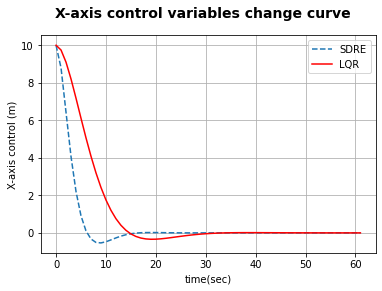

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(t_sol, x_soll[0, :]-x_ref[0, :], '--', label='SDRE')
plt.plot(t_sol, x_sol[0, :]-x_ref[0, :], 'r', label='LQR')
plt.grid()
fig.suptitle('X-axis control variables change curve', fontsize=14, fontweight='bold')
ax.set_xlabel('time(sec)')
ax.set_ylabel('X-axis control (m)')
ax.legend()

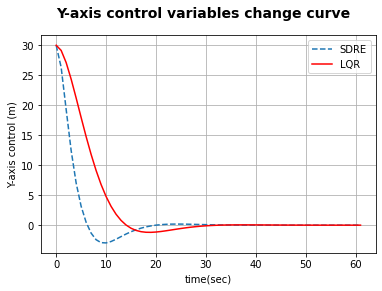

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(t_sol, x_soll[1, :]-x_ref[1, :], '--', label='SDRE')
plt.plot(t_sol, x_sol[1, :]-x_ref[1, :], 'r', label='LQR')
plt.grid()
fig.suptitle('Y-axis control variables change curve', fontsize=14, fontweight='bold')
ax.set_xlabel('time(sec)')
ax.set_ylabel('Y-axis control (m)')
ax.legend()

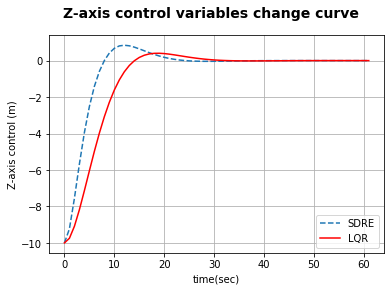

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(t_sol, x_soll[2, :]-x_ref[2, :], '--', label='SDRE')
plt.plot(t_sol, x_sol[2, :]-x_ref[2, :], 'r', label='LQR')
plt.grid()
fig.suptitle('Z-axis control variables change curve', fontsize=14, fontweight='bold')
ax.set_xlabel('time(sec)')
ax.set_ylabel('Z-axis control (m)')
ax.legend()

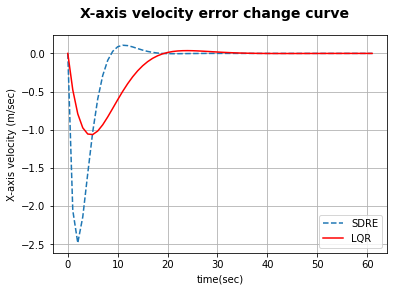

In [21]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(t_sol, x_soll[3, :]-x_ref[3, :], '--', label='SDRE')
plt.plot(t_sol, x_sol[3, :]-x_ref[3, :], 'r', label='LQR')
plt.grid()
fig.suptitle('X-axis velocity error change curve', fontsize=14, fontweight='bold')
ax.set_xlabel('time(sec)')
ax.set_ylabel('X-axis velocity (m/sec)')
ax.legend()

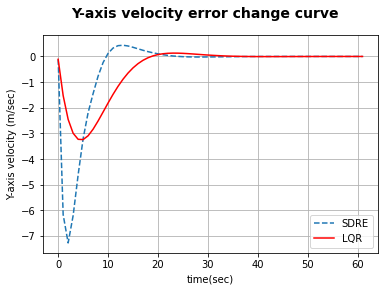

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(t_sol, x_soll[4, :]-x_ref[4, :], '--', label='SDRE')
plt.plot(t_sol, x_sol[4, :]-x_ref[4, :], 'r', label='LQR')
plt.grid()
fig.suptitle('Y-axis velocity error change curve', fontsize=14, fontweight='bold')
ax.set_xlabel('time(sec)')
ax.set_ylabel('Y-axis velocity (m/sec)')
ax.legend()

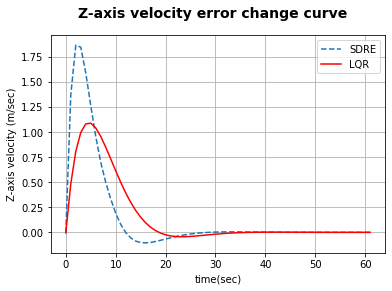

In [23]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(t_sol, x_soll[5, :]-x_ref[5, :], '--', label='SDRE')
plt.plot(t_sol, x_sol[5, :]-x_ref[5, :], 'r', label='LQR')
plt.grid()
fig.suptitle('Z-axis velocity error change curve', fontsize=14, fontweight='bold')
ax.set_xlabel('time(sec)')
ax.set_ylabel('Z-axis velocity (m/sec)')
ax.legend()

Из приведенного сравнения монжно увидеть что LQR оптимальнее управляет спутником, в отличие от SDRE